# Funciones de distribución de probabilidades
## Distribución Uniforme

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
a = 1
b = 100
n = 1000000
data = np.random.uniform(a, b, n)

(array([ 99888., 100089., 100089.,  99994., 100258.,  99609., 100272.,
         99852., 100147.,  99802.]),
 array([ 1.00023005, 10.90019609, 20.80016213, 30.70012816, 40.6000942 ,
        50.50006023, 60.40002627, 70.29999231, 80.19995834, 90.09992438,
        99.99989042]),
 <a list of 10 Patch objects>)

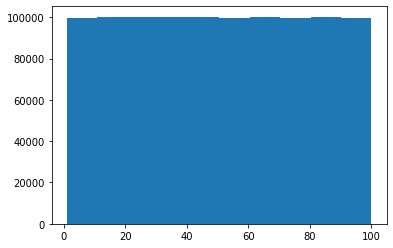

In [3]:
%matplotlib inline
plt.hist(data)

## Distribución Normal

In [4]:
data = np.random.randn(1000000)

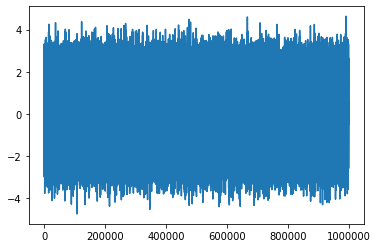

In [5]:
x = range(1,1000001)
plt.plot(x, data)

(array([8.50000e+01, 2.02400e+03, 2.46400e+04, 1.33523e+05, 3.17362e+05,
        3.33193e+05, 1.55103e+05, 3.11440e+04, 2.82400e+03, 1.02000e+02]),
 array([-4.74526201, -3.80713838, -2.86901475, -1.93089112, -0.9927675 ,
        -0.05464387,  0.88347976,  1.82160338,  2.75972701,  3.69785064,
         4.63597427]),
 <a list of 10 Patch objects>)

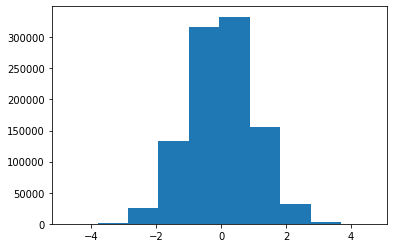

In [6]:
%matplotlib inline
plt.hist(data)

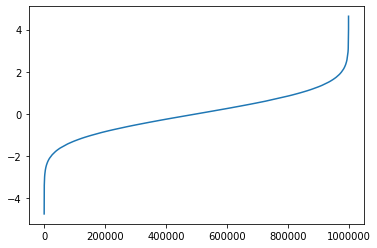

In [7]:
plt.plot(x,sorted(data))

(array([   4.,  115.,  593., 1713., 3009., 2747., 1384.,  378.,   48.,
           9.]),
 array([-4.29104827, -2.27796754, -0.26488681,  1.74819392,  3.76127465,
         5.77435538,  7.78743611,  9.80051684, 11.81359756, 13.82667829,
        15.83975902]),
 <a list of 10 Patch objects>)

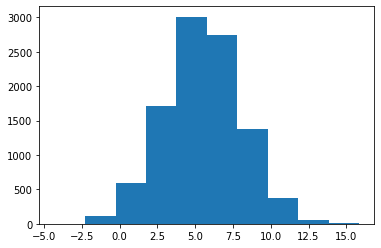

In [8]:
mu = 5.5
sd = 2.5
Z_10000 = np.random.randn(10000)
data = mu + sd * Z_10000 # Z = (X - mu) / sd -> N(0,1), X = mu + sd * Z
plt.hist(data)

In [9]:
data = np.random.randn(2,4)
data

array([[-0.17683113, -0.37714649, -0.49558284,  0.26186895],
       [-2.23127493,  1.32336896, -0.64470064, -1.40543896]])

## La simulación de Monte Carlo

* Generamos dos números aleatorios uniforme x e y entre 0 y 1 en total 1000 veces.
* Calcularemos $z = x^2 + y^2$:
    * Si $z < 1 \rightarrow$ estamos dentro del círculo.
    * Si $z \geq 1 \rightarrow$ estamos fuera del círculo.
* Calculamos el número total de veces que están dentro del círculo y lo dividimos entre el número total de intentos para obtener una aproximación de la probabilidad de caer dentro del círculo.
* Usamos dicha probabilidad para aproximar el valor de π.
* Repetimos el experimento un número suficiente de veces (por ejemplo 100), para obtener (100) diferentes aproximaciones de π. 
* Calculamos el promedio de los 100 experimentos anteriores para dar un valor final de π.
    

In [10]:
def pi_montecarlo(n, n_exp):
    pi_avg = 0
    pi_value_list = []
    for i in range(n_exp):
        value = 0
        x = np.random.uniform(0,1,n).tolist()
        y = np.random.uniform(0,1,n).tolist()
        for j in range(n):
            z = np.sqrt(x[j] * x[j] + y[j] * y[j])
            if z<=1:
                value += 1
        float_value = float(value)
        pi_value = float_value * 4 / n
        pi_value_list.append(pi_value)
        pi_avg += pi_value

    pi = pi_avg/n_exp

    print(pi)
    fig = plt.plot(pi_value_list)
    return (pi, fig)

3.14289


(3.14289, [<matplotlib.lines.Line2D at 0x1178041d0>])

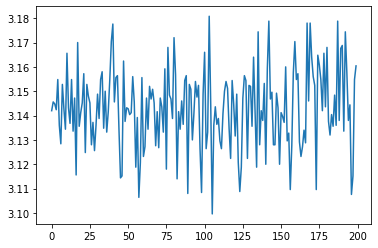

In [11]:
pi_montecarlo(10000, 200)

### Dummy Data Sets

In [12]:
n = 1000000
data = pd.DataFrame(
    {
        'A' : np.random.randn(n),
        'B' : 1.5 + 2.5 * np.random.randn(n),
        'C' : np.random.uniform(5, 32, n)
    }
)

In [13]:
data.describe()

,A,B,C
count,1000000.000000,1000000.000000,1000000.000000
mean,-0.000052,1.503753,18.492374
std,0.999631,2.499070,7.790482
min,-4.801772,-10.392760,5.000005
25%,-0.673280,-0.181055,11.747874
50%,0.000654,1.503452,18.492031
75%,0.673354,3.190897,25.230810
max,4.618336,13.720179,31.999999


(array([5.30000e+01, 1.75000e+03, 2.22770e+04, 1.26411e+05, 3.13103e+05,
        3.39026e+05, 1.60936e+05, 3.33270e+04, 3.00000e+03, 1.17000e+02]),
 array([-4.80177187, -3.85976109, -2.91775032, -1.97573955, -1.03372878,
        -0.09171801,  0.85029276,  1.79230353,  2.7343143 ,  3.67632507,
         4.61833584]),
 <a list of 10 Patch objects>)

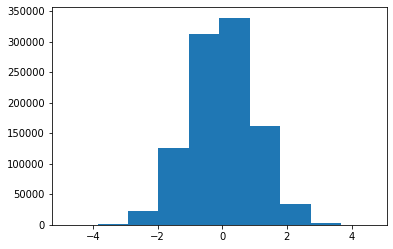

In [14]:
plt.hist(data["A"])

(array([7.20000e+01, 2.26000e+03, 2.85770e+04, 1.53012e+05, 3.41700e+05,
        3.22413e+05, 1.28827e+05, 2.15370e+04, 1.55000e+03, 5.20000e+01]),
 array([-10.39275961,  -7.98146572,  -5.57017183,  -3.15887794,
         -0.74758405,   1.66370984,   4.07500373,   6.48629762,
          8.89759151,  11.30888539,  13.72017928]),
 <a list of 10 Patch objects>)

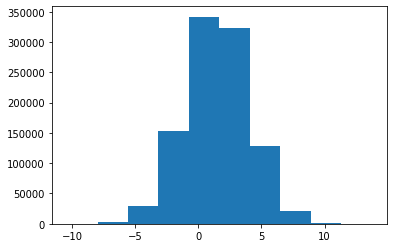

In [15]:
plt.hist(data["B"])

(array([100327.,  99551., 100248.,  99820., 100325., 100275., 100334.,
         99831.,  99759.,  99530.]),
 array([ 5.00000453,  7.70000402, 10.40000351, 13.100003  , 15.80000249,
        18.50000198, 21.20000146, 23.90000095, 26.60000044, 29.29999993,
        31.99999942]),
 <a list of 10 Patch objects>)

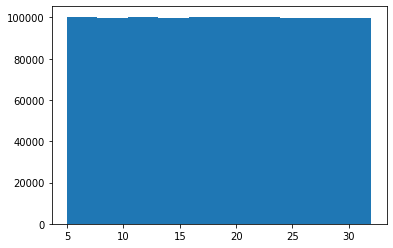

In [16]:
plt.hist(data["C"])

In [17]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [18]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [19]:
colum_names = data.columns.values.tolist()

In [20]:
a = len(colum_names)
a

21

In [21]:
new_data = pd.DataFrame(
    {
        'Column Name': colum_names,
        'A' : np.random.randn(a),
        'B' : np.random.uniform(0,1,a)
    }, index = range(42, 42 + a)
)

In [22]:
new_data

,Column Name,A,B
42,State,1.591375,0.047867
43,Account Length,0.490423,0.709472
44,Area Code,-0.135459,0.411615
45,Phone,0.659722,0.041393
46,Int'l Plan,0.786774,0.828636
47,VMail Plan,-0.051904,0.254860
48,VMail Message,-0.854422,0.935552
49,Day Mins,0.789506,0.285457
50,Day Calls,0.180972,0.103087
51,Day Charge,1.459158,0.243396
